# Binning

Binning is a data processing technique used to group or bin data into buckets, reducing the amount of detail (noise) in the data, which helps to simplify the data and reduce overfitting. We can reduce the amount of detail in both categorical and numerical features.

### Import Basic Packages

In [5]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

## Categorical Binning

In this dataset we have the basic stats for a number of different players. Points per game is the target variable.

In [6]:
#import Categorical binning dataset
df_bball = pd.read_csv('basketball_stats.csv')
df_bball.head()

,first_name,last_name,points_per_game,reb_per_game,assist_per_game,3pt_per_game,steals_per_game,blocks_per_game,position
0,Stephen,Larry,25,4,3,7,1.8,0.2,PG
1,Lebron,Games,30,12,11,3,1.3,1.0,SF
2,Grayson,Ballen,10,3,2,2,0.9,0.2,SG
3,Luke,Dontik,35,9,10,4,0.8,0.6,PG
4,Lonjo,Tall,7,6,10,2,1.5,0.6,PG


Categorical varisbles can be grouped or binned into more general categories. In this example, each value in our Position column represents the position that player typically plays. However, it's possible to further categorise the positions into Guard, Forward and Centre.

In [7]:
# Check the value counts for each of the categories in the Position column.
df_bball['position'].value_counts()

SG    22
PG    21
C     13
SF    12
PF    11
Name: position, dtype: int64

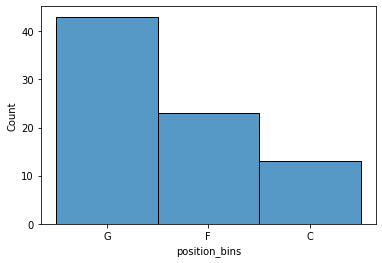

In [8]:
# Create a new column called PositionBins and use the map function to map the positions to their respective bins.
df_bball['position_bins'] = df_bball['position'].map({'PG': 'G',
                                                     'SG' : 'G',
                                                     'SF' : 'F',
                                                     'PF' : 'F',
                                                     'C' : 'C'})

sns.histplot(df_bball['position_bins'])
plt.show()

### Categorical Binning - High Cardinality Feature

Binning can also be useful to help simplify high cardinality categorical features. This is particluarly the case with post code or zipcode data where you may want to group postal codes into districts, cities or states.

## Numerical Binning

For numerical binning, we are returning to our kc_house_dataset from previous workbooks.

In [12]:
# Import Data
df_house = pd.read_csv('kc_house_data.csv')
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors
count,1.799800e+04,1.799800e+04,17998.000000,17998.000000,17998.000000,1.799800e+04,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,4.568087e+09,5.330919e+05,3.363040,2.061660,2051.873542,1.575891e+04,1.433187,0.007834,0.242471,3.448494,7.592399,1749.776753,302.096789,1967.283143,90.258529,98078.071119,47.560217,-122.215113,1973.275808,13282.408768
std,2.862863e+09,3.644146e+05,0.934003,0.758612,902.743082,4.245632e+04,0.509667,0.088166,0.778876,0.667045,1.169519,805.436490,449.449853,27.940879,414.728679,54.126155,0.139646,0.139139,673.185162,27353.168648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,2.123049e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.450250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.465525,-122.327000,1490.000000,5419.250000
50%,3.905121e+09,4.470000e+05,3.000000,2.000000,1900.000000,7.903500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7820.000000
75%,7.298015e+09,6.355875e+05,4.000000,2.500000,2500.000000,1.109575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679300,-122.127000,2338.250000,10344.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


### View & Bin the Original Data using HistPlot

By plotting a simple histogram we can view the original distribution of the feature, and apply a visual interpretation of bins.

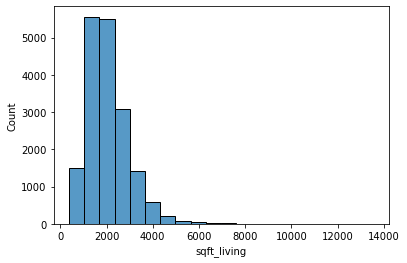

In [13]:
# Plot a countplot of the AssistPerGame variable to see what the unaltered distribution looks like.
sns.histplot(data = df_house, x ='sqft_living', bins = 20)
plt.show()

However, the above method only allows us to visually summarise the data into bins. The bins are not stored anywhere.

### Defining our Bin Names

In [14]:
labels = ["small", "medium", "large"]

### Numerical Binning - Equal Width

Equal width binning divides numerical data into buckets, each of which have the same width on the original x axis.

In [15]:
# Plot a histplot showing the sqft_bin variable grouped into 3 bins with equal width.
df_house['sqft_bin'] = pd.cut(df_house['sqft_living'],bins = 3, labels = labels)
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living_15neighbors,sqft_lot_15neighbors,sqft_bin
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,small
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,small
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,small
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,small
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,4254000620,20141007T000000,410000.0,3,2.50,1860,15457,2.0,0,0,3,8,1860,0,1997,0,98019,47.7383,-121.955,2040,14055,small
17994,6414100026,20150108T000000,320000.0,2,1.00,1802,11225,1.0,0,0,3,7,1802,0,1961,0,98125,47.7205,-122.323,1810,7332,small
17995,1346300035,20140626T000000,1990000.0,5,3.00,4480,5000,2.5,0,0,5,12,3420,1060,1902,0,98112,47.6275,-122.315,3220,5600,small
17996,2212210360,20140702T000000,253000.0,2,1.00,1310,7128,1.0,0,0,4,7,940,370,1980,0,98031,47.3958,-122.189,1400,7161,small


In [16]:
#Inspect the sqft_bin column, before and after adding the labels to see what is happening. Also try the value_counts().
df_house['sqft_bin'].value_counts()

small     17794
medium      198
large         6
Name: sqft_bin, dtype: int64

### Numerical Binning - Equal Frequency

Equal frequency binning divides a numerical feature into buckets, each of which have the same or similar number of observations.
- In this case, since we have some values that appear many times, they must all appear in the same bin.
- Since the bins each represent a different proportion of the original X scale, we must give each one a name.
- You may come across 'quartile binning' which is simply equal frequency binning using 4 bins.

In [17]:
# Create a new column in the dataframe and use the qcut function to create 3 equal freqency bins.
df_house['sqft_bin_freq'] = pd.qcut(df_house['sqft_living'], q=3, labels = labels)

In [21]:
#Explore the value counts of the sqft_bin_freq column. How does it differ from the equal width method?
df_house['sqft_bin_freq'].value_counts()

small     6012
medium    5998
large     5988
Name: sqft_bin_freq, dtype: int64

As we can see above, once we converted the values into buckets, the distribution became much more simplified and smoother. These smoother distributions allow for simplier interpretation of our data and may reduce the noise submitted to our models. 

### Numerical Binning - Manual Method

Manual binning allows us to define the boundaries of each bin ourselves.

In the above example, our research tells us that the housing tax brackets change at 2000 and at 5000 sqft. Since we know that people consider tax payments when purchasing houses, it seems more logical to think that these boundaries might be a sinsible way to bin this variable



In [23]:
df_house['sqft_bin_manual'] = pd.cut(df_house['sqft_living'],
                              [1,2000,5000,20000],
                              labels = labels)
df_house['sqft_bin_manual'].value_counts()

small     9935
medium    7901
large      162
Name: sqft_bin_manual, dtype: int64

Interval Notation
- (1, 2000) : do NOT include 1, do NOT include 2000
- [1, 2000) : INCLUDE 1, do NOT include 2000
- (1, 2000] : do NOT include 1, INCLUDE 2000
- [1, 2000] : INCLUDE 1, INCLUDE 2000

### Applying these methods to testing data

If we simply apply cut or qcut to our testing data we will get different results (the exception being manual binning). Again, we need to find a way to apply the same binning thresholds to our testing data.

The implementation with pandas is fairly simple, using the **ret_bins = True** argument to confirm that we want to save our bins in the variable training_bins. We can then re-use our training bins as the input to the cut method on our testing data. You can read more about it at the below link:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [ ]:
#Note this code i
df_house['sqft_bin_manual'], training_bins = pd.cut(df_house['sqft_living'],
                              [1,2000,5000,20000],
                              labels = labels,
                              retbins= True)
df_house.head()

In [ ]:
#Note this code will not work by default. It is here to demonstrate syntax only.
df_house_test = pd.read_csv('kc_house_data_test.csv')
df_house_test['sqft_bin_manual'] = pd.cut(df_house_test['sqft_living'],
                              bins = training_bins,
                              labels = labels)
df_house_test

### Summary of Binning Methods So Far

In practice, we try not to bin if possible, since this destroys some of the information we have in our data. Our first choice would be to bin for a good reason associated with domain knowledge or justification such as in the above example.



### Numerical Smoothing using Bin Averages

Smoothing is similar to binning, but instead of turning values into a categorical field, values are replaced by the mean, median or boundary value from their respective bins. Below is an example of bin smoothing using bin means. Note that to apply this to a testing dataset, a little more work would be required to maintain the same means for the testing bins.

In [ ]:
# Find the average value per bin
sqft_bin_mean = df_house.groupby('sqft_bin_manual').mean()['sqft_living']
sqft_bin_mean

# Assigning a new value based on the bin average
df_house['sqft_bin_manual_smooth'] = sqft_bin_mean.loc[df_house['sqft_bin_manual']].reset_index(drop = True)
df_house

### Binning Using SKLearn

In many cases, once we have permormed **binning to generate buckets or groups**, we'll need to **encode those categories** using one hot encoding, or labels in order to reach a numeric dataset.

Instead of doing each separately, SKLearn's **KBinsDiscretizer** allows us to perform both actions together. This will be demonstrated in a separate workbook.

Documentation for KBinsDiscretizer can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

### Numerical Smoothing using Bin Averages

Smoothing is similar to binning, but instead of turning values into a categorical field, values are replaced by the mean, median or boundary value from their respective bins. Below is an example of bin smoothing using bin means. Note that to apply this to a testing dataset, a little more work would be required to maintain the same means for the testing bins.

In [25]:
# Find the average value per bin
sqft_bin_mean = df_house.groupby('sqft_bin_manual').mean()['sqft_living']
sqft_bin_mean

# Assigning a new value based on the bin average
df_house['sqft_bin_manual_smooth'] = sqft_bin_mean.loc[df_house['sqft_bin_manual']].reset_index(drop = True)

### Exercise 1: Binning a Histogram

Below is data of basketball players displaying their jumping attribute.

In [ ]:
#import the basketball dataset
df_dunk = pd.read_csv('dunk_data.csv')
df_dunk

In [ ]:
# Display the unaltered distribution of the jump column
sns.histplot(df_dunk['jump'], discrete = True)
plt.show()

In [ ]:
# Display a binned version of the above histogram with 5 equal width bins
sns.histplot(df_dunk['jump'], bins = 5)
plt.show()

### Exercise 2 (Advanced): Apply bins to training and testing data using Pandas

Below is data of basketball players displaying their attributes. Bin the height column to tall and very tall with a threshold of 2m.

In [ ]:
#apply binning with the threshold of 2m to the height column
df_dunk = pd.read_csv('dunk_data.csv')
df_dunk

In [ ]:
labels = ['tall','vtall']
df_dunk['height_bin'], train_bins = pd.cut(df_dunk['height'],
                              [1,200,300],
                              labels = labels,
                              retbins= True)
df_dunk

In [ ]:
#apply binning with the threshold of 2m to the height column
df_dunk_test = pd.read_csv('dunk_data_test.csv')

In [ ]:
#Note this code will not work by default. It is here to demonstrate syntax only.
df_dunk_test['height_bin'] = pd.cut(df_dunk_test['height'],
                              bins = train_bins,
                              labels = labels)
df_dunk_test.head()